In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None,
                         resolution=0.02):
    
    # resolutionはメモリの細かさ
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Zはモデルからの予測値
    display(Z)
    # classifierは学習済みモデル
    Z = Z.reshape(xx1.shape)
    # reshapeで２次元配列にする
    # contorufで２軸上に境界線を書くために横軸と縦軸が必要
    display(Z)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # contourfで境界線を引く,alphaは透明度
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        # enumerateで要素の数え上げのカウントとその値を返す
        
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        # Xの散布図
        
    if test_idx:
        print(test_idx)
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')
        #実測位のプロット
        

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [4]:
display(df_wine)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [6]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=y)
## stratify is class labels

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [10]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [11]:
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train));
print('Test accuracy:', lr.score(X_test_std, y_test));

Training accuracy: 1.0
Test accuracy: 1.0


/home/measurement1nhk/py37_ml2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/measurement1nhk/py37_ml2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
display(lr.intercept_)

array([-1.2632045 , -1.21597678, -2.37042128])

In [17]:
display(lr.coef_)

array([[ 1.24549457,  0.18061022,  0.74237502, -1.16039497,  0.        ,
         0.        ,  1.17450653,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54332954,  2.51099593],
       [-1.53701606, -0.38731557, -0.99507024,  0.36503683, -0.05970378,
         0.        ,  0.66788176,  0.        ,  0.        , -1.93423179,
         1.23353197,  0.        , -2.23161041],
       [ 0.13584127,  0.16834354,  0.35728779,  0.        ,  0.        ,
         0.        , -2.43832442,  0.        ,  0.        ,  1.56353923,
        -0.81901749, -0.49236767,  0.        ]])

In [18]:
X_combiend_std = np.vstack((X_train_std, X_test_std))
y_combiend = np.hstack((y_train, y_test))

-4.0
------
-3.0
------
-2.0
------
-1.0
------
0.0
------
1.0
------
2.0
------
3.0
------
4.0
------
5.0
------
13


/home/measurement1nhk/py37_ml2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/measurement1nhk/py37_ml2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/measurement1nhk/py37_ml2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/measurement1nhk/py37_ml2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/measurement1nhk/py37_ml2/lib/python3

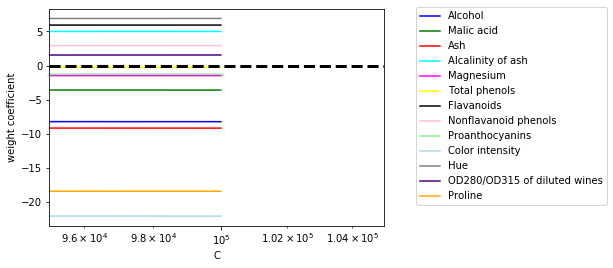

In [21]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
         'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    print(c)
    print('------')
    lr = LogisticRegression(penalty='l1', C=10.**c,
                           random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
print(weights.shape[1])
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label=df_wine.columns[column + 1],
            color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(--5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
         ncol=1, fancybox=True)
plt.show();